In [ ]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph,START,END 
from typing import TypedDict
import os
from dotenv import load_dotenv

load_dotenv()
llm = ChatGroq(api_key=os.getenv('GROK_API_KEY'),model=os.getenv('MODEL_NAME'),max_completion_tokens=500,verbose=True)

/home/nilesh/miniconda3/envs/langchain_learning/lib/python3.10/site-packages/pydantic/main.py:250: UserWarning: WARNING! max_completion_tokens is not default parameter.
                    max_completion_tokens was transferred to model_kwargs.
                    Please confirm that max_completion_tokens is what you intended.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [5]:
# define the state first
class LLMQAState(TypedDict):
    question: str
    answer: str

In [ ]:
llm.invoke()

In [30]:
# create node for LLM Question Answering
def ask_question(state:LLMQAState)->LLMQAState:
    message = [{"role":"system","content": "You are a helpful assistant"},{"role": "user", "content": state['question']}]
    res = llm.invoke(input=message)
    state['answer'] = res.content
    return state

In [31]:
# define the graph
llm_workflow = StateGraph(LLMQAState)

# add the nodes
llm_workflow.add_node("ask_question",ask_question)

# add the edges
llm_workflow.add_edge(START,"ask_question")
llm_workflow.add_edge("ask_question",END)

# print the graph
graph = llm_workflow.compile()

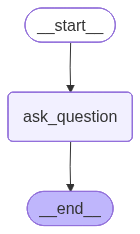

In [32]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [34]:
graph.invoke({'question':"how far moon from earth in km?"})

{'question': 'how far moon from earth in km?',
 'answer': "The average distance from the Earth to the Moon is approximately 384,400 kilometers (238,900 miles). However, this distance varies slightly due to the elliptical shape of the Moon's orbit around our planet.\n\nAt its closest point (called perigee), the Moon is about 356,400 kilometers (221,500 miles) away from Earth. At its farthest point (apogee), the distance is around 405,500 kilometers (252,000 miles).\n\nSo, to give you a precise answer: 384,400 km is the average distance, but it can range from approximately 356,400 km to 405,500 km."}